In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functionst import * 
%matplotlib inline

In [2]:
# Dataset1: Client Profiles: Demographics like age, gender, and account details of our clients.

In [3]:
file_path='data/df_final_demo.txt'

df_clients = pd.read_csv(file_path, delimiter=',')
df_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
# Dataset2: Digital Footprints pt1 & pt2: A detailed trace of client interactions online, divided into two parts: pt_1 and pt_2. It’s recommended to merge these two files prior to a comprehensive data analysis.

In [5]:
file_path='data/df_final_web_data_pt_1.txt'
df2 = pd.read_csv(file_path, delimiter=',')

In [6]:
file_path = "Data/df_final_web_data_pt_1.txt"
df3 = pd.read_csv(file_path, delimiter=',')

In [7]:
df_concat = pd.concat([df2, df3])
df_concat["source"] = "final_web_data"

Cleaning df_Clients

Check for Duplicates

In [8]:
df_clients.duplicated().sum() # Check

0

In [9]:
# Rename columns
df_clients.rename(columns={"clnt_tenure_yr": "client_tenure_yr",
                           "clint_tenure_mnth":"client_tenure_mnth",
                           "clnt_age":"client_age",
                           "gendr":"gender",
                           "bal":"balance"
                           }, inplace=True)

In [10]:
# Checking for NaN Rows
nan_rows = df_clients[df_clients.isna().any(axis=1)]
# Drop NaN Values with more many NaNs
df_clients.dropna(thresh=4,inplace=True)
# Fill NaN in client age
df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)

/var/folders/z2/8yvwb6_51rd1bxl1j1s0xpm40000gp/T/ipykernel_4984/3195465480.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)


In [11]:
# Drop NaN Values with more many NaNs
df_clients.dropna(thresh=4,inplace=True)

In [12]:
# Fill NaN in client age
df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)

/var/folders/z2/8yvwb6_51rd1bxl1j1s0xpm40000gp/T/ipykernel_4984/1302661028.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clients["client_age"].fillna(df_clients["client_age"].mean(),inplace=True)


In [13]:
df_clients["client_age"].describe()

count    70595.000000
mean        46.442240
std         15.591162
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: client_age, dtype: float64

In [14]:
# Defining age Group and Assigning to client Data

df_clients["client_age_group"] = df_clients["client_age"].apply(age_group)

In [15]:
df_clients.head(5)

,client_id,client_tenure_yr,clnt_tenure_mnth,client_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,client_age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,adult
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,adult
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,adult
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,adult
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,adult


Who are the clients

In [16]:
# Who are the clients?
most_clients = df_clients.groupby("client_age_group")["logons_6_mnth"].sum().sort_values( ascending=False)
most_clients

client_age_group
adult     327501.0
senior     56789.0
teen        8694.0
Name: logons_6_mnth, dtype: float64

Text(0, 0.5, 'logins last 6 month')

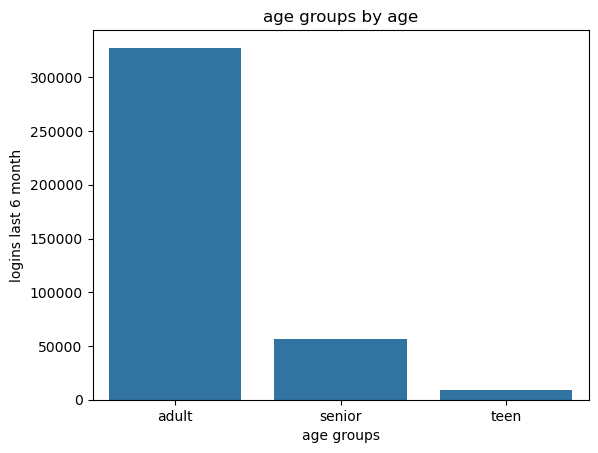

In [32]:
# Checking 
sns.barplot(data= most_clients)
plt.title("age groups by age")
plt.xlabel("age groups")
plt.ylabel("logins last 6 month")

Clean df_concat

Check for Duplicates

In [17]:
df_concat.duplicated().sum()

345236

In [18]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686282 entries, 0 to 343140
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     686282 non-null  int64 
 1   visitor_id    686282 non-null  object
 2   visit_id      686282 non-null  object
 3   process_step  686282 non-null  object
 4   date_time     686282 non-null  object
 5   source        686282 non-null  object
dtypes: int64(1), object(5)
memory usage: 36.7+ MB


In [47]:
df_concat["process_step"].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [45]:
df_concat[df_concat["client_id"]==9988021]

,client_id,visitor_id,visit_id,process_step,date_time,source
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,final_web_data
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,final_web_data
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,final_web_data
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,final_web_data
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,final_web_data
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,final_web_data
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,final_web_data
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,final_web_data
129,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:54:43,final_web_data
130,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:38:42,final_web_data


In [43]:
df_concat[df_concat["process_step"] == "step_3"][["process_step","date_time"]]

,process_step,date_time
0,step_3,2017-04-17 15:27:07
2,step_3,2017-04-17 15:19:22
4,step_3,2017-04-17 15:18:04
9,step_3,2017-04-05 13:09:43
16,step_3,2017-04-05 12:26:08
...,...,...
343112,step_3,2017-04-20 12:46:09
343118,step_3,2017-04-12 16:56:21
343124,step_3,2017-04-12 16:52:59
343131,step_3,2017-04-13 10:00:26


In [20]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686282 entries, 0 to 343140
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     686282 non-null  int64 
 1   visitor_id    686282 non-null  object
 2   visit_id      686282 non-null  object
 3   process_step  686282 non-null  object
 4   date_time     686282 non-null  object
 5   source        686282 non-null  object
dtypes: int64(1), object(5)
memory usage: 36.7+ MB


In [21]:
df_concat.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
source          0
dtype: int64

In [22]:
#Dataset 3: Experiment Roster: A list revealing which clients were part of the grand experiment.

In [23]:
file_path='data/df_final_experiment_clients.txt'
df_roster = pd.read_csv(file_path, delimiter=',')
df_roster["source"] = "final_experiment"
df_roster.head()

,client_id,Variation,source
0,9988021,Test,final_experiment
1,8320017,Test,final_experiment
2,4033851,Control,final_experiment
3,1982004,Test,final_experiment
4,9294070,Control,final_experiment
